In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

avg_df = pd.read_csv(r"D:\User2\OneDrive\Desktop\cleanSwiggy.csv") 

In [7]:
avg_df['avgRating'] = avg_df['avgRating'].astype('str')
avg_df.tail()

,avgRating,deliveryTime
8691,--,77.0
8692,4,72.0
8693,--,70.0
8694,--,66.0
8695,--,67.0


In [8]:
avg_df['avgRating'] = avg_df.avgRating.str.extract('(\d\.?\d*)')

In [9]:
avg_df.tail()

,avgRating,deliveryTime
8691,NaN,77.0
8692,4,72.0
8693,NaN,70.0
8694,NaN,66.0
8695,NaN,67.0


In [10]:
avg_df = avg_df.dropna()
avg_df = avg_df.reset_index(drop=True)

In [11]:
avg_df["avgRating"] = avg_df.avgRating.astype(float)
avg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5412 entries, 0 to 5411
Data columns (total 2 columns):
avgRating       5412 non-null float64
deliveryTime    5412 non-null float64
dtypes: float64(2)
memory usage: 84.6 KB


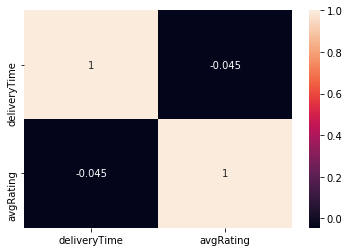

In [12]:
viz=sns.heatmap(avg_df[['deliveryTime','avgRating']].corr(),annot=True)

In [13]:
x=sm.add_constant(avg_df['deliveryTime'])
y=avg_df['avgRating']
print(x.shape)
print(y.shape)
x

(5412, 2)
(5412,)


C:\Users\HP\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,deliveryTime
0,1.0,44.0
1,1.0,33.0
2,1.0,28.0
3,1.0,29.0
4,1.0,28.0
5,1.0,50.0
6,1.0,27.0
7,1.0,33.0
8,1.0,36.0
9,1.0,28.0


In [14]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.5,test_size=0.5,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2706, 2)
(2706, 2)
(2706,)
(2706,)


In [15]:
avgRating_lm = sm.OLS(y_train,x_train).fit()

In [16]:
print(avgRating_lm.params)

const           4.174036
deliveryTime   -0.001222
dtype: float64


In [17]:
avgRating_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.002    
Dependent Variable: avgRating        AIC:                1821.0280
Date:               2022-12-02 22:59 BIC:                1832.8344
No. Observations:   2706             Log-Likelihood:     -908.51  
Df Model:           1                F-statistic:        7.166    
Df Residuals:       2704             Prob (F-statistic): 0.00747  
R-squared:          0.003            Scale:              0.11467  
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const          4.1740    0.0246  169.5869  0.0000   4.1258   4.2223
deliveryTime  -0.0012    0.0005   -2.6769  0.0075  -0.0021  -0.0003
------------------------------------------------------------------
Omnibus:              502.637      Durbin-Watson:         1.988   
Prob(Omnibus):        0.000        Jarque-Bera (JB):      1172.207
Skew:                 -1.040       Prob(JB):              0.000   
Kurtosis:             5.464        Condition No.:         204     
==================================================================

"""

In [18]:
y_pred_test=avgRating_lm.predict(x_test)
y_pred_train=avgRating_lm.predict(x_test)

In [19]:
np.abs(r2_score(y_test,y_pred_test))

0.0011873360423401147

In [20]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

0.35098859894777884

Text(0, 0.5, 'Predicted')

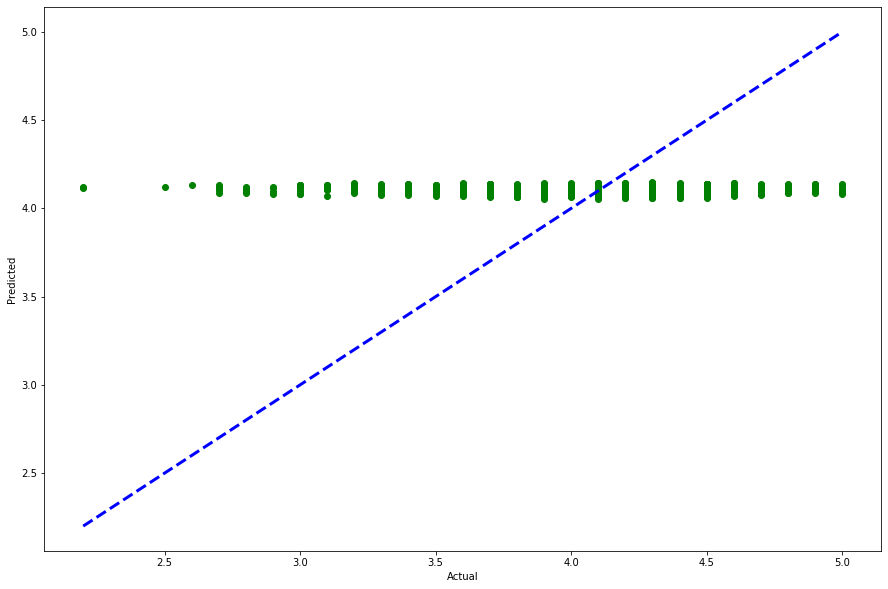

In [21]:
plt.figure(figsize=(15,10))
plt.scatter(y_train,y_pred_train,c='green')
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k--',c='blue',lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [22]:
pred_y_df=pd.DataFrame({'Delivery Time':x_train['deliveryTime'],'Average rating':y_train,'pred_y':y_pred_train})
pred_y_df[0:20]

,Delivery Time,Average rating,pred_y
0,NaN,NaN,4.120278
1,33.0,4.2,NaN
2,28.0,4.3,NaN
3,29.0,3.9,NaN
4,NaN,NaN,4.139826
5,NaN,NaN,4.112947
6,27.0,4.4,NaN
7,33.0,3.9,NaN
8,NaN,NaN,4.130052
9,28.0,4.2,NaN
